<img src='https://gazetadasemana.com.br/images/noticias/78040/30064552_altaLOGOS_.png.png' width=500>

# Artificial Neural Network with artificially oversampled data
Authorship: Raul Macedo

Creates ANN for data artificially oversampled with SMOTE on `oversampling.ipynb`

In [13]:
#General imports
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from utils import train_model_if_doesnt_exist

In [39]:

train1_fill = pd.read_csv('./oversampling/oversampling_with_artificial_data/train_data_fill1.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})
train2_fill = pd.read_csv('./oversampling/oversampling_with_artificial_data/train_data_fill2.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})
train3_fill = pd.read_csv('./oversampling/oversampling_with_artificial_data/train_data_fill3.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})

test1_fill = pd.read_csv('./feature_selection_results/test1.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})
test2_fill = pd.read_csv('./feature_selection_results/test2.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})
test3_fill = pd.read_csv('./feature_selection_results/test3.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})

In [9]:
train_in1_art = train1_fill.drop(columns=['class'])
train_out1_art = pd.DataFrame(train1_fill['class'])
train_in2_art = train2_fill.drop(columns=['class'])
train_out2_art = pd.DataFrame(train2_fill['class'])
train_in3_art = train3_fill.drop(columns=['class'])
train_out3_art = pd.DataFrame(train3_fill['class'])

test_in1_art = test1_fill.drop(columns=['class'])
test_out1_art = pd.DataFrame(test1_fill['class'])

test_in2_art = test2_fill.drop(columns=['class'])
test_out2_art = pd.DataFrame(test2_fill['class'])

test_in3_art = test3_fill.drop(columns=['class'])
test_out3_art = pd.DataFrame(test3_fill['class'])

In [12]:

def normalize_data(data,range_=(0,1)):
  scaler = MinMaxScaler(feature_range=range_)
  return scaler.fit_transform(data),scaler


train_in1n,scaler_train_in1n = normalize_data(train_in1_art)
test_in1n,scaler_test_in1n = normalize_data(test_in1_art)
train_out1n,scaler_train_out1n = normalize_data(train_out1_art)
test_out1n,scaler_test_out1n = normalize_data(test_out1_art)

train_in2n,scaler_train_in2n = normalize_data(train_in2_art)
test_in2n,scaler_test_in2n = normalize_data(test_in2_art)
train_out2n,scaler_train_out2n = normalize_data(train_out2_art)
test_out2n,scaler_test_out2n = normalize_data(test_out2_art)

train_in3n,scaler_train_in3n = normalize_data(train_in3_art)
test_in3n,scaler_test_in3n = normalize_data(test_in3_art)
train_out3n,scaler_train_out3n = normalize_data(train_out3_art)
test_out3n,scaler_test_out3n = normalize_data(test_out3_art)


train_out1n_art = np.ravel(train_out1n)
train_out2n_art = np.ravel(train_out2n)
train_out3n_art = np.ravel(train_out3n)


## **Case 1: Using GridSearchCV to determine MLP parameters and train model**

In [21]:
parameters1 = {
    'hidden_layer_sizes': [(6,),(10,),(15,),(6,6),(6,4,4)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

ultron_art1 = train_model_if_doesnt_exist(train_in1n,train_out1n,parameters1,'./ann_models/after_data_filling/artificially_filled/ultron_art1_PRP.pkl')


In [22]:
ultron_art1

MLPClassifier(activation='tanh', hidden_layer_sizes=(6, 4, 4), max_iter=100)

Text(0, 0.5, 'erro')

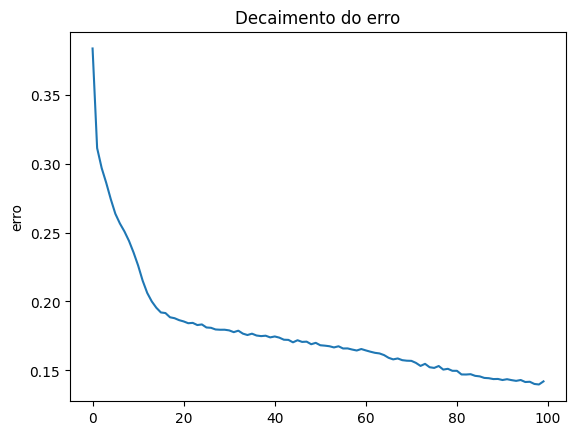

In [23]:
plt.plot(ultron_art1.loss_curve_)
plt.title('Decaimento do erro')
plt.ylabel('erro')


### **Analising model with test data - case 1**

In [24]:
out1_pred = ultron_art1.predict(test_in1n)

In [25]:
out1_pred_df = pd.DataFrame(out1_pred)
out_des_pred1 = scaler_test_out1n.inverse_transform(out1_pred_df)

              precision    recall  f1-score   support

         0.0       0.62      0.93      0.74     10060
         5.0       0.99      0.94      0.97     98540

    accuracy                           0.94    108600
   macro avg       0.81      0.94      0.85    108600
weighted avg       0.96      0.94      0.95    108600

Accuracy is  0.9402670349907919


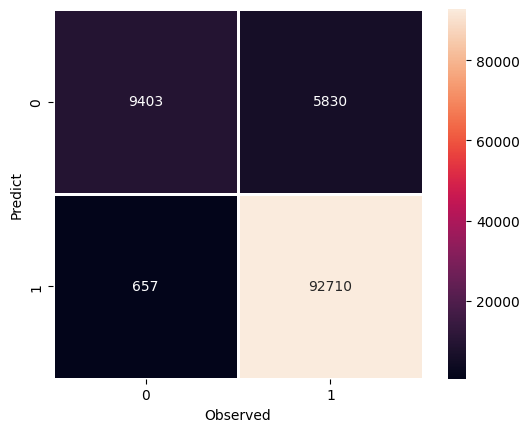

In [26]:
def plot_confusion_matrix(observed_data:np.ndarray,predicted_data:np.ndarray):
    mat = confusion_matrix(observed_data,predicted_data)
    sns.heatmap(mat.T,square=True,annot=True,fmt='d',linewidths=1)
    plt.xlabel('Observed')
    plt.ylabel('Predict')
    print(classification_report(observed_data,predicted_data))
    print('Accuracy is ',accuracy_score(observed_data,predicted_data))
    return


plot_confusion_matrix(test_out1_art,out_des_pred1)

### **Analising model with train data - case 1**

              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83     70425
         5.0       0.94      0.97      0.95    229923

    accuracy                           0.92    300348
   macro avg       0.91      0.88      0.89    300348
weighted avg       0.92      0.92      0.92    300348

Accuracy is  0.923608614007751


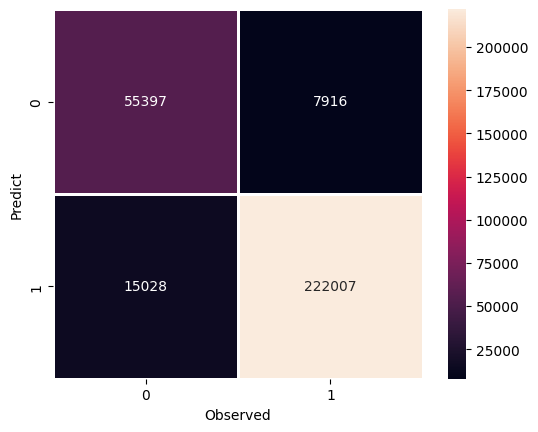

In [27]:
out1_pred = ultron_art1.predict(train_in1n)
out1_pred_df = pd.DataFrame(out1_pred)
out_des_pred1 = scaler_train_out1n.inverse_transform(out1_pred_df)

plot_confusion_matrix(train_out1_art,out_des_pred1)

# **Case 2 - Taking away T-TPT & P-MON-CKP**
## **Using GridSearchCV to determine MLP parameters and train model - Case 2**

In [29]:
parameters2 = {
    'hidden_layer_sizes': [(4,),(10,),(15,),(4,6),(4,4,4)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
ultron_art2 = train_model_if_doesnt_exist(train_in2n,train_out2n,parameters2,'./ann_models/after_data_filling/artificially_filled/ultron_art2_PRP.pkl')

In [45]:
with open('./ann_models/after_data_filling/artificially_filled/ultron_art2_PRP.pkl', 'rb') as f:
    ultron_art2 = pickle.load(f)

Text(0, 0.5, 'erro')

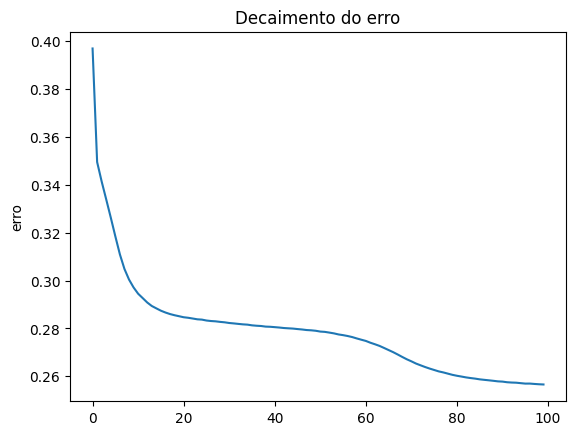

In [30]:
plt.plot(ultron_art2.loss_curve_)
plt.title('Decaimento do erro')
plt.ylabel('erro')

### **Analising model with test data - case 2**

              precision    recall  f1-score   support

         0.0       0.89      0.47      0.61     10037
         5.0       0.95      0.99      0.97     98563

    accuracy                           0.95    108600
   macro avg       0.92      0.73      0.79    108600
weighted avg       0.94      0.95      0.94    108600

Accuracy is  0.9455893186003683


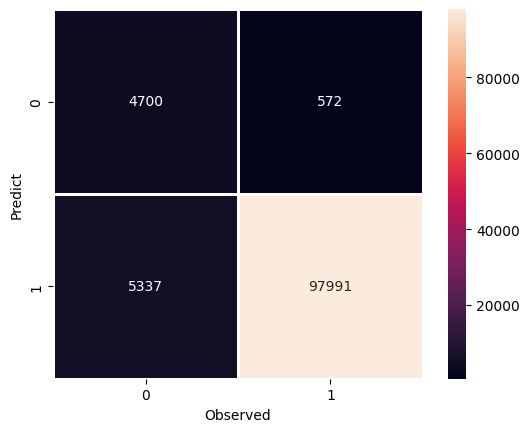

In [32]:

out2_pred = ultron_art2.predict(test_in2n)

out2_pred_df = pd.DataFrame(out2_pred)
out_des_pred2 = scaler_test_out2n.inverse_transform(out2_pred_df)

plot_confusion_matrix(test_out2_art,out_des_pred2)


### **Analising model with train data - case 2**


              precision    recall  f1-score   support

         0.0       0.96      0.46      0.62     70494
         5.0       0.86      0.99      0.92    229900

    accuracy                           0.87    300394
   macro avg       0.91      0.73      0.77    300394
weighted avg       0.88      0.87      0.85    300394

Accuracy is  0.8691285445115415


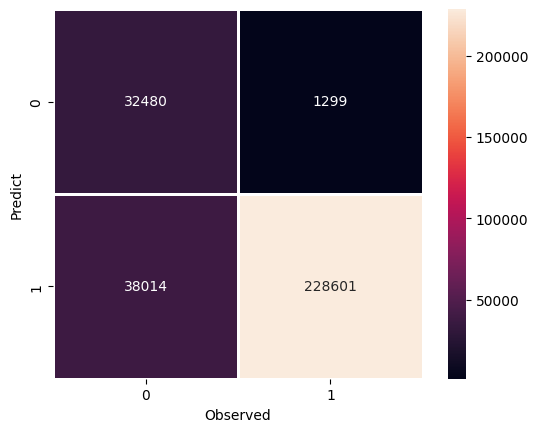

In [33]:
out2_pred = ultron_art2.predict(train_in2n)

out2_pred_df = pd.DataFrame(out2_pred)
out_des_pred2 = scaler_train_out2n.inverse_transform(out2_pred_df)


plot_confusion_matrix(train_out2_art,out_des_pred2)



# Case 3: Desconsiderando P-TPT e P-MON-CKP
### **Definindo parâmetros da rede com GridSearch - Caso 3**

In [34]:
ultron_art3 = train_model_if_doesnt_exist(train_in3n,train_out3n,parameters2,'./ann_models/after_data_filling/artificially_filled/ultron_art3_PRP.pkl')

Text(0, 0.5, 'erro')

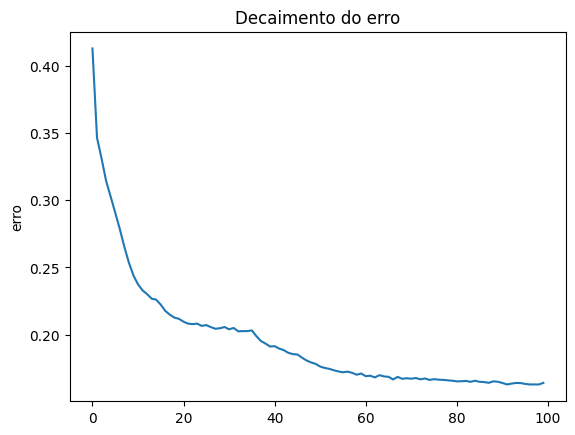

In [35]:
plt.plot(ultron_art3.loss_curve_)
plt.title('Decaimento do erro')
plt.ylabel('erro')

### **Analising model with test data - case 3**

              precision    recall  f1-score   support

         0.0       0.60      0.81      0.69      9986
         5.0       0.98      0.95      0.96     98614

    accuracy                           0.93    108600
   macro avg       0.79      0.88      0.83    108600
weighted avg       0.95      0.93      0.94    108600

Accuracy is  0.9337937384898711


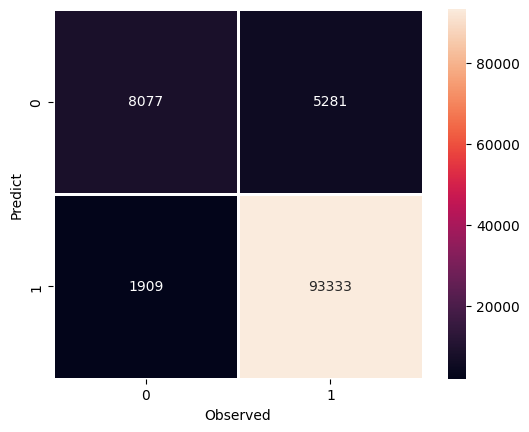

In [36]:
out3_pred = ultron_art3.predict(test_in3n)

out3_pred_df = pd.DataFrame(out3_pred)
out_des_pred3 = scaler_test_out3n.inverse_transform(out3_pred_df)


plot_confusion_matrix(test_out3_art,out_des_pred3)

### **Analising model with train data - case 3**


              precision    recall  f1-score   support

         0.0       0.83      0.80      0.81     70647
         5.0       0.94      0.95      0.94    229849

    accuracy                           0.91    300496
   macro avg       0.88      0.87      0.88    300496
weighted avg       0.91      0.91      0.91    300496

Accuracy is  0.9132134870347692


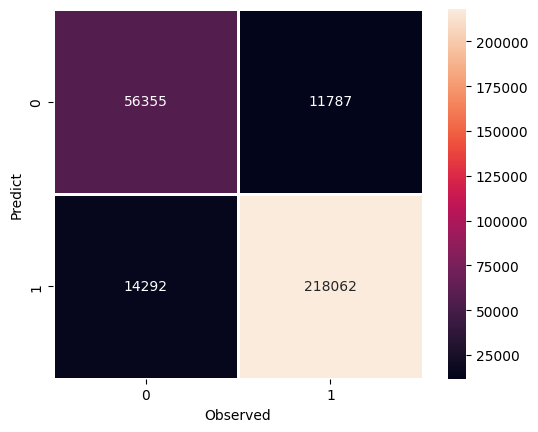

In [37]:
out3_pred = ultron_art3.predict(train_in3n)

out3_pred_df = pd.DataFrame(out3_pred)
out_des_pred3 = scaler_train_out3n.inverse_transform(out3_pred_df)


plot_confusion_matrix(train_out3_art,out_des_pred3)